## Week 4 - Example1

### In this example we’ll use the logistic regression code to demonstrate how Tensorflow computes gradients.

Check the plots for this!

In [18]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
from IPython import display

plt.style.use('ggplot')

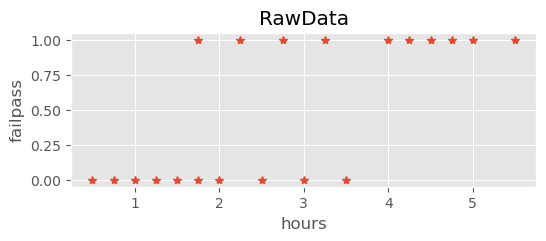

In [43]:
# Enter data in mympy array
hours= np.array([0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,
2.25,2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50])
failpass=np.array([0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1], dtype = float)
                   
# Plot the data
plt.figure(figsize=(6,2))
plt.plot(hours, failpass,'*') 
plt.xlabel('hours') 
plt.ylabel('failpass') 
plt.title("RawData") 
plt.show() 

In [20]:
# create constant for the intercept parameter. We will fix the intercept to the
# maximum likelihood estimate so our model only has a single parameter to vary
b0 = tf.constant(-4.0769134,dtype=tf.float64)

In [21]:
# create functions for predicted probability of passing and the prediction error
def logistic_model(X, b1):
    return tf.sigmoid(tf.add(tf.multiply(X, b1), b0))
def loss(y, y_pred):
    return -tf.reduce_sum(y*tf.math.log(y_pred)) \
    -tf.reduce_sum((1.0-y)*tf.math.log(1.0-y_pred))


In [22]:
# computing the loss and the gradient of the loss w.r.t. b
def loss_gradient(x, y, b1):
    with tf.GradientTape() as tape:
        # as b1 is a tensor that we pass into the function we
        # have to make sure that it is being 'watched' and
        # will be included in the gradient tape calculations
        tape.watch(b1)
        # we now run the operations for the logistic model
        y_pred = logistic_model(x, b1)
        current_loss = loss(y, y_pred)
        
        
    # now use the tape to get the derivative with automatic differentiation
    gradient = tape.gradient(current_loss, b1)
    return current_loss, gradient


Before we look at the gradients of the loss function, we’ll plot the value of the loss itself as a function of
the slope parameter b1  #how?

In [44]:
loss_gradient(hours, failpass, b1)

(<tf.Tensor: shape=(), dtype=float64, numpy=37.417110882146275>,
 <tf.Tensor: shape=(), dtype=float64, numpy=-36.6709273371373>)

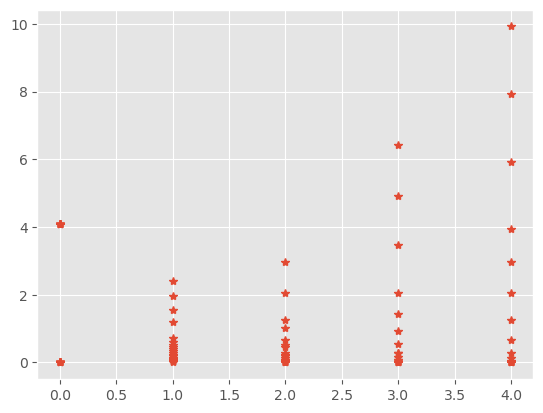

In [34]:
# logdir = '/home/jovyan/logs'
# writer = tf.summary.create_file_writer(logdir)
# # Bracket the function call with trace_on and trace_export
# tf.summary.trace_on()

with writer.as_default(): # use the contex manager to specify the writer
    cel =[]
    par =[]
    for i in range(20) :
               for b1 in range(5):
                   y_pred = logistic_model(hours[i], b1)
                   par.append(b1)
                   current_loss = loss(failpass[i], y_pred)
                   cel.append(current_loss)
                   tf.summary.scalar('loss', current_loss, step=i)
    plt.plot(par,cel, '*')
    plt.show()
    

<!-- b1 = tf.Variable(1.0, dtype=tf.float64)
loss_gradient(hours, failpass, b1) -->

### Next, we’ll look at the gradient of the loss function at different values of the parameter b1 by computing the gradient using two methods

Finite difference approximation

In [38]:
type(failpass)

numpy.ndarray

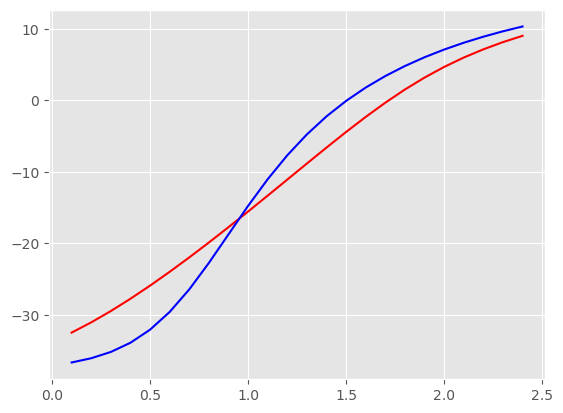

In [77]:
# set up some arrays to store the output
bvals = np.arange(0.1,2.5,0.1)
finite_grads = np.zeros_like(bvals)
autodiff_grads = np.zeros_like(bvals)
# set a difference for the finite difference scheme
# we will use a large step size first
db = 1.0 
for i in range(len(bvals)):
    # convert the numpy value to a tensorflow variable
    b1 = tf.convert_to_tensor(bvals[i], tf.float64)
    # compute the loss value either side of b
    bp_loss, _ = loss_gradient(hours, failpass, b1+db)
    bm_loss, _ = loss_gradient(hours, failpass, b1-db)
    
    #compute the gradient with finite difference
    fd_grad=(bp_loss - bm_loss)/(2*db)
    
    #compute the gradient with AD
    _, ad_grad = loss_gradient(hours, failpass, b1)
    
    # store the results
    finite_grads[i]=fd_grad
    autodiff_grads[i]=ad_grad
    #print( fd_grad)
# print(finite_grads)
#print(bvals)
plt.plot(bvals,finite_grads, 'red')
plt.plot(bvals,autodiff_grads, 'blue')
plt.show()

In [71]:
range(len(bvals))

range(0, 24)